In [1]:
from cookie_clusters import *

In [2]:
import sys
# show the python path
display(sys.path)
sys.path.append('/Users/nada/FilRouge_territoires')
display(sys.path)

['/Users/nada/FilRouge_territoires/notebooks',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python39.zip',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/lib-dynload',
 '',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages']

['/Users/nada/FilRouge_territoires/notebooks',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python39.zip',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/lib-dynload',
 '',
 '/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages',
 '/Users/nada/FilRouge_territoires']

In [3]:
from models.multiple_cluster_combination_system import CollaborativeClustering
from sklearn.cluster import AgglomerativeClustering

/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [5]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

matrice_nir = pd.read_csv('../data/processed/vec_nir.csv').to_numpy()
matrice_rouge = pd.read_csv('../data/processed/vec_red.csv').to_numpy()
matrice_vert = pd.read_csv('../data/processed/vec_green.csv').to_numpy()
matrice_bleu = pd.read_csv('../data/processed/vec_blue.csv').to_numpy()
matrice_ndvi = pd.read_csv('../data/processed/vec_ndvi.csv').to_numpy()
matrice_ndwi = pd.read_csv('../data/processed/vec_ndwi.csv').to_numpy()

# ROUGE

In [6]:
matrice = np.delete(matrice_rouge,22,1)

In [7]:
support_matrice = pd.DataFrame(matrice)
support_matrice.head()

classes = list()

for i in pixels_de_interet:
    for j, k in zip(list(dic_de_pixels.keys()), range(0, len(list(dic_de_pixels.keys())))):
        if i in list(dic_de_pixels[j]):
            classes.append(k)

In [8]:
reducer = umap.UMAP(random_state=42)
embedding_rouge = reducer.fit_transform(matrice)

/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
cah = AgglomerativeClustering(n_clusters = 4)
cah.fit(embedding_rouge)
yhat_rouge = cah.labels_

# VERT

In [10]:
matrice = np.delete(matrice_vert,22,1)

In [11]:
reducer = umap.UMAP(random_state=42)
embedding_vert = reducer.fit_transform(matrice)

/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
cah = AgglomerativeClustering(n_clusters = 4)
cah.fit(embedding_vert)
yhat_vert = cah.labels_

# Bleu

In [13]:
matrice = np.delete(matrice_bleu,22,1)

In [14]:
reducer = umap.UMAP(random_state=42)
embedding_bleu = reducer.fit_transform(matrice)

/Users/nada/miniconda3/envs/filrouge2/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [15]:
cah = AgglomerativeClustering(n_clusters = 4)
cah.fit(embedding_bleu)
yhat_bleu = cah.labels_

In [16]:
yhat_rouge

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Imposer nombre de clusters sur HDBSCAN

In [17]:
import hdbscan
from hdbscan.flat import (HDBSCAN_flat,
                          approximate_predict_flat,
                          membership_vector_flat,
                          all_points_membership_vectors_flat)

In [18]:
# hdbscan = HDBSCAN_flat(embedding_rouge,cluster_selection_method='leaf', n_clusters = 5)
# yhat_rouge = hdbscan.labels_

# hdbscan = HDBSCAN_flat(embedding_bleu,cluster_selection_method='leaf', n_clusters = 5)
# yhat_bleu = hdbscan.labels_

# hdbscan = HDBSCAN_flat(embedding_vert,cluster_selection_method='leaf', n_clusters = 5)
# yhat_vert = hdbscan.labels_


# Votating

In [19]:
# embedding_bleu.shape

In [20]:
# clusters=[]
# clusters.append(yhat_rouge.tolist())
# clusters.append(yhat_vert.tolist())
# clusters.append(yhat_bleu.tolist())

In [21]:
# n_bandes=3
# matrice = [[[] for _ in range(0, 4)] for _ in range(4*(n_bandes-1))]

# print(matrice[clusters[1][0]][clusters[0][0]])

In [22]:
# for i in range(len(clusters[0])):
#     matrice[clusters[1][i]][clusters[0][i]].append(i)
#     matrice[4+clusters[2][i]][clusters[0][i]].append(i)

In [23]:
# import random as rd 
# # Matrice de confusion
# confusion = [[len(matrice[j][i]) for i in range(4)] for j in range(4*(n_bandes-1))]
# confusion = np.array(confusion).astype(dtype=np.float16)

# for i in range(confusion.shape[0]):
#     for j in range(confusion.shape[1]):
#         confusion[i, j] = confusion[i, j]/(max(confusion[i, :].sum(),(confusion[:, j].sum()/2)))

# # Construction du vecteur clusters
# vect_cluster = [0]*(4*(n_bandes-1))
# for i in range(confusion.shape[0]):
#     vect_cluster[i] = np.argmax(confusion[i,:])

# # To relabel clustering results
# clusters_relabeled = list(clusters)
# j = 1
# while j < n_bandes:
#     for k in range(0, 4):
#         clusters_relabeled[j] = np.where(clusters[j] == k, vect_cluster[k+4*(j-1)], clusters_relabeled[j])
#     j += 1

# # Matrice de clusterings "relabeled"
# results = np.column_stack(clusters_relabeled)  # attention : cases NaN si les listes clusters ne sont pas de la même taille. np.unique va les ignorer.

# # Vote et génération des clusters finaux
# final_clusters = []
# for i in range(len(clusters[0])):
#     values, counts = np.unique(results[i, :], return_counts=True)
#     if np.all(counts == 1):
#         final_clusters.append(rd.randint(0, 4))
#     else:
#         final_clusters.append(values[counts.argmax()])
# final_clusters = final_clusters

# print(final_clusters)

In [24]:
from scipy.spatial.distance import euclidean
import fastdtw as dtw

print(matrice_rouge)
matrice_rouge[0,:].reshape(-1)
matrice_rouge[0,:].shape


[[ 315.  306.  271. ...  207.  194.   55.]
 [ 302.  311.  190. ...  197.  208.   71.]
 [ 228.  246.  298. ...  189.  171.   58.]
 ...
 [3351. 4021. 3102. ... 3369. 3546. 3950.]
 [2449. 2300. 3704. ... 3296. 3227. 3622.]
 [2196. 2894. 2903. ... 3457. 3691. 4296.]]


(141,)

In [25]:
dtw.fastdtw(matrice_rouge[0,:].reshape(-1,1),matrice_rouge[1,:].reshape(-1,1),dist=euclidean)[0]

5459.0

In [26]:
vote_hdbscan = CollaborativeClustering(matrice_rouge, matrice_bleu, matrice_vert, n_clusters=5)
clusters = vote_hdbscan.umap_hdbscan_clustering()
yhat = vote_hdbscan.iccm()
print(yhat)

[2 0 2 2 0 1 5 2 2 3 3 3 3 3 3 3 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2
 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0]


In [27]:
vote_dtw = CollaborativeClustering(matrice_rouge, matrice_bleu, matrice_vert, n_clusters=5)
clusters = vote_dtw.dtw_clustering()
yhat = vote_dtw.iccm()
print(yhat)

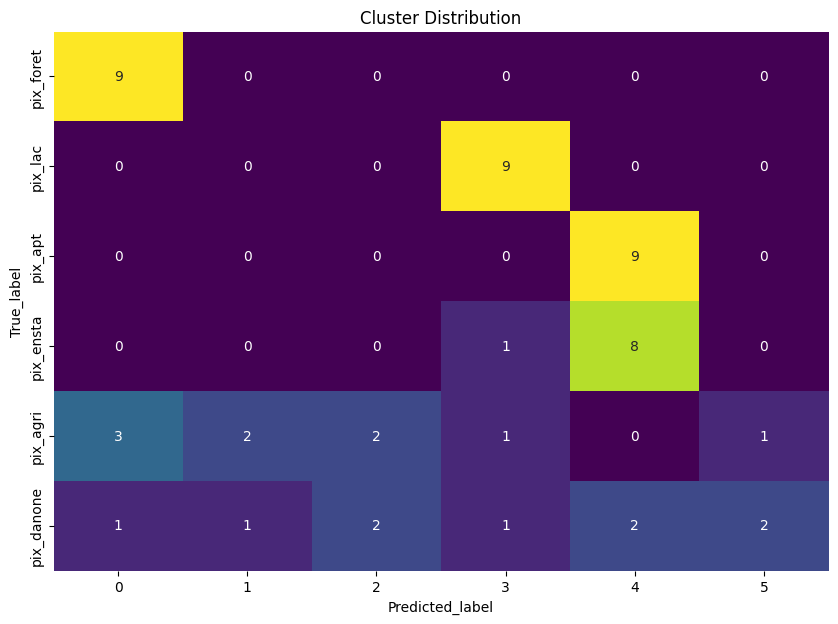

In [ ]:
evaluator = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, matrice)
evaluator.cluster_distribution()